_This Project has lot of data pre-processing_

The dataset is available at the below link
> Kaggle [Fligh Fare prediction dataset](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh)

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Train Data

In [80]:
df = pd.read_excel("Data_Train.xlsx")

In [81]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


With help of these all feature we are going to Predict the **Price**

In [82]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [83]:
print(df.isnull().sum())
#we have one missing value better to drop
df.dropna(inplace=True)
print("\n")
print(df.isnull().sum())

#no null !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [84]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


 ## EDA
 We are going to deep dive into Ocean frnds,So Prepare !

**Date_of_Journey**

In [85]:
# Date_of_Journey dtype is now converted to datatime 
#from this we can extract all we need
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [86]:
df['day_Journey'] = df.Date_of_Journey.dt.day
df['month_Journey'] = df.Date_of_Journey.dt.month
df['year_Journey'] = df.Date_of_Journey.dt.year

In [87]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_Journey,month_Journey,year_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [88]:
df['year_Journey'].value_counts()

2019    10682
Name: year_Journey, dtype: int64

Now we can drop **Date_of_Journey** and **year** as of process of dimensionality reduction

In [89]:
df.drop(['Date_of_Journey','year_Journey'], axis = 1, inplace = True)

In [90]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_Journey,month_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


 **Dep_Time**

In [91]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [92]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
day_Journey                 int64
month_Journey               int64
dtype: object

In [93]:
df['Dep_hour'] = df.Dep_Time.dt.hour
df['Dep_min'] = df.Dep_Time.dt.minute

In [94]:
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [95]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_Journey,month_Journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


**Arrival_Time**

In [96]:
 df['Arrival_Time'].head(10)

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
5           11:25
6    10:25 13 Mar
7    05:05 02 Mar
8    10:25 13 Mar
9           19:15
Name: Arrival_Time, dtype: object

In [97]:
#converting to datetime
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
#extracting hour and minute
df['AT_hour'] = df.Arrival_Time.dt.hour
df['AT_min'] = df.Arrival_Time.dt.minute
#deleting the Arrival_Time after extracting
df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [98]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


**Duration**

In [99]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

    
# Adding duration_hours and duration_mins list to train_data dataframe
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [100]:
df.drop(["Duration"], axis = 1, inplace = True)

In [101]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


**Handling Categorical Data**

One can find many ways to handle categorical data. Some of them categorical data are,

1. **Nominal data** (Unordered data)--> **OneHotEncoder** is prefered

2. **Ordinal data** (Ordered data)  --> **LabelEncoder** is prefered




**Airline**

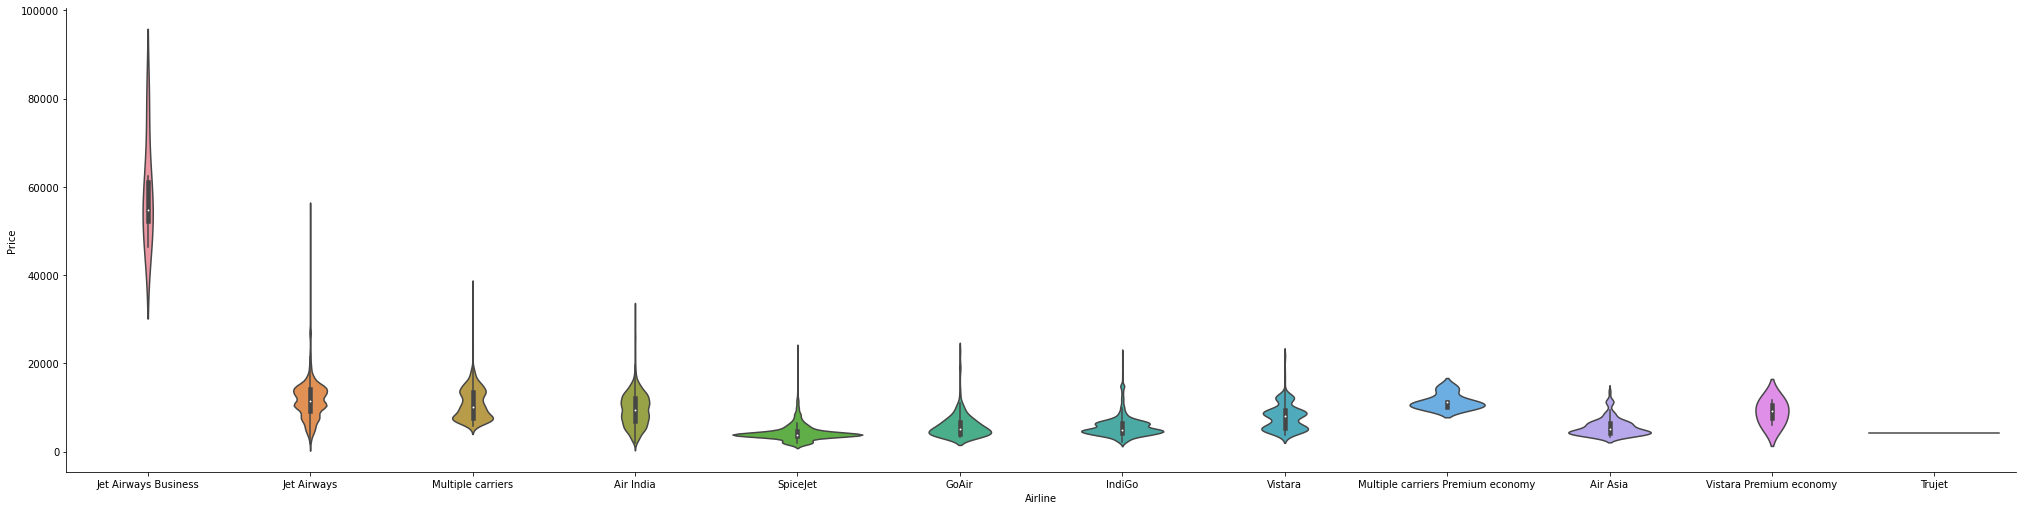

In [102]:
sns.catplot(y='Price',x='Airline',data=df.sort_values("Price",ascending= False),kind="violin",height=7,aspect=4)

with drop_first = True to prevent it for **Dummy variable Trap**

In [103]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)

In [105]:
Airline.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


**Source**

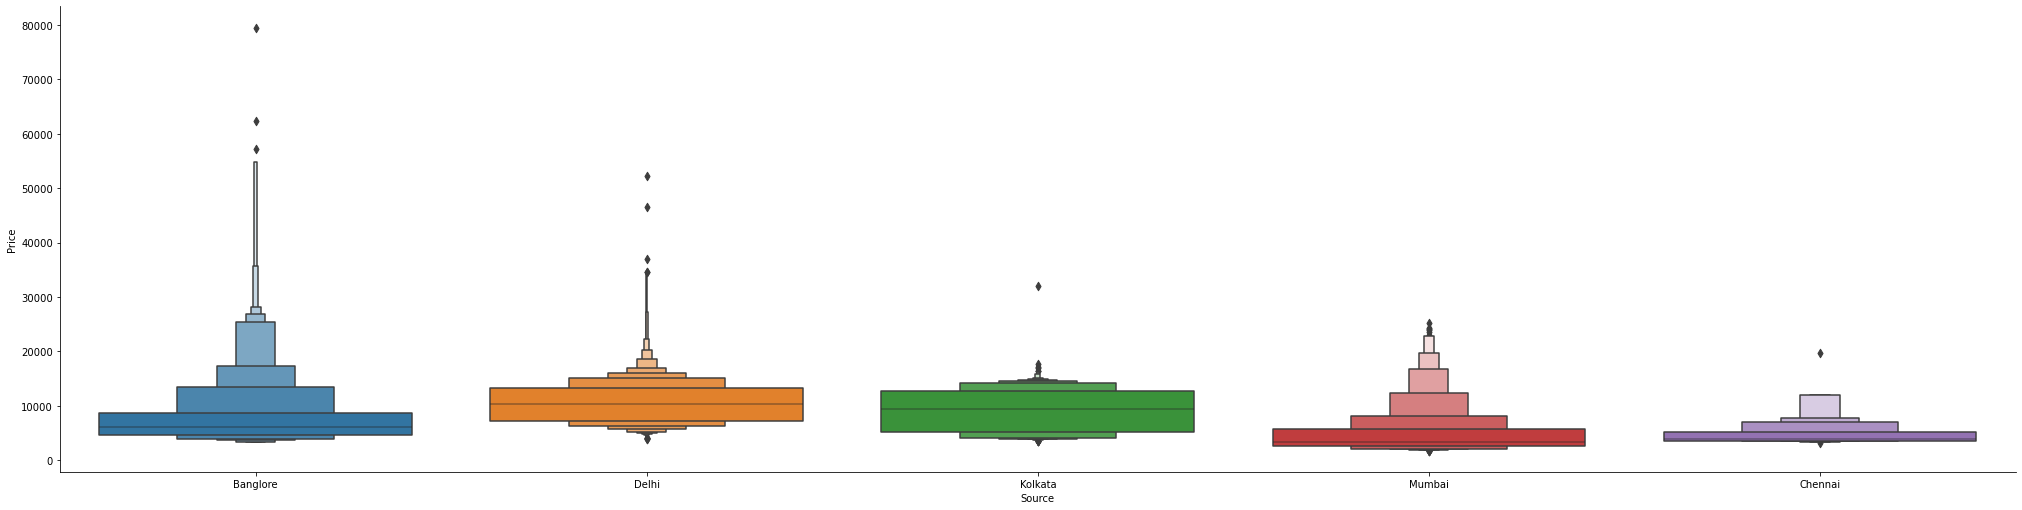

In [107]:
sns.catplot(y='Price',x='Source',data=df.sort_values("Price",ascending= False),kind="boxen",height=7,aspect=4)

In [108]:
Source = pd.get_dummies(df['Source'],drop_first=True)

In [109]:
Source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


**Destination**

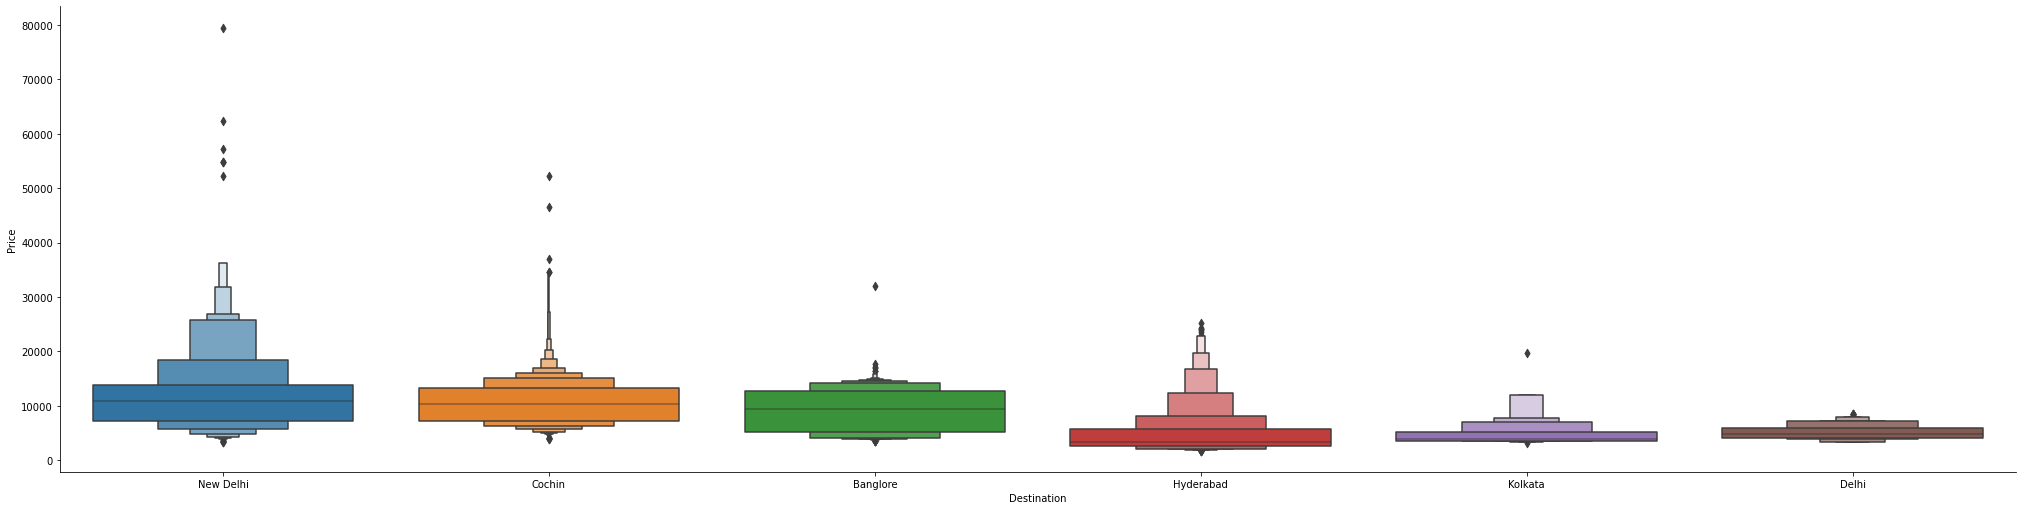

In [111]:
sns.catplot(y='Price',x='Destination',data=df.sort_values("Price",ascending= False),kind="boxen",height=7,aspect=4)

In [112]:
Destination = pd.get_dummies(df['Destination'],drop_first=True)

In [113]:
Destination.head(2)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [115]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


### Note
1. Route resembles the Total_stops so we can drop Route feature
2. Additional_Info has 80% of **No info** value,so we can drop this feature

In [117]:
df.drop(['Route','Additional_Info'],axis = 1,inplace = True)

In [118]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25


**Total_Stops**

In [119]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [120]:
#Ordinal
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [121]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25


In [122]:
data_train = pd.concat([df,Airline,Source,Destination],axis =1)

In [123]:
data_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0


In [124]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [125]:
data_train.head(2)

,Total_Stops,Price,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


 ## Test Data

In [126]:
test_data = pd.read_excel("Test_set.xlsx")
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


> Doing the same thing which was done to the _Train data_, but seperatly.Because to avoid the `dataLeakage`

In [127]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

We 28 features in our hand but in this only few feeature play major role in predicting the `Traget`.we will do **Feature Selection**

In [129]:
data_train.columns

Index(['Total_Stops', 'Price', 'day_Journey', 'month_Journey', 'Dep_hour',
       'Dep_min', 'AT_hour', 'AT_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [131]:
X = data_train.loc[:, ['Total_Stops', 'day_Journey', 'month_Journey', 'Dep_hour',
       'Dep_min', 'AT_hour', 'AT_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]
X.head(3)

,Total_Stops,day_Journey,month_Journey,Dep_hour,Dep_min,AT_hour,AT_min,Duration_hours,Duration_mins,Air India,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,1,0,0,0,0,0,0,1,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,0,1,1,0,0,0,0,0


In [132]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

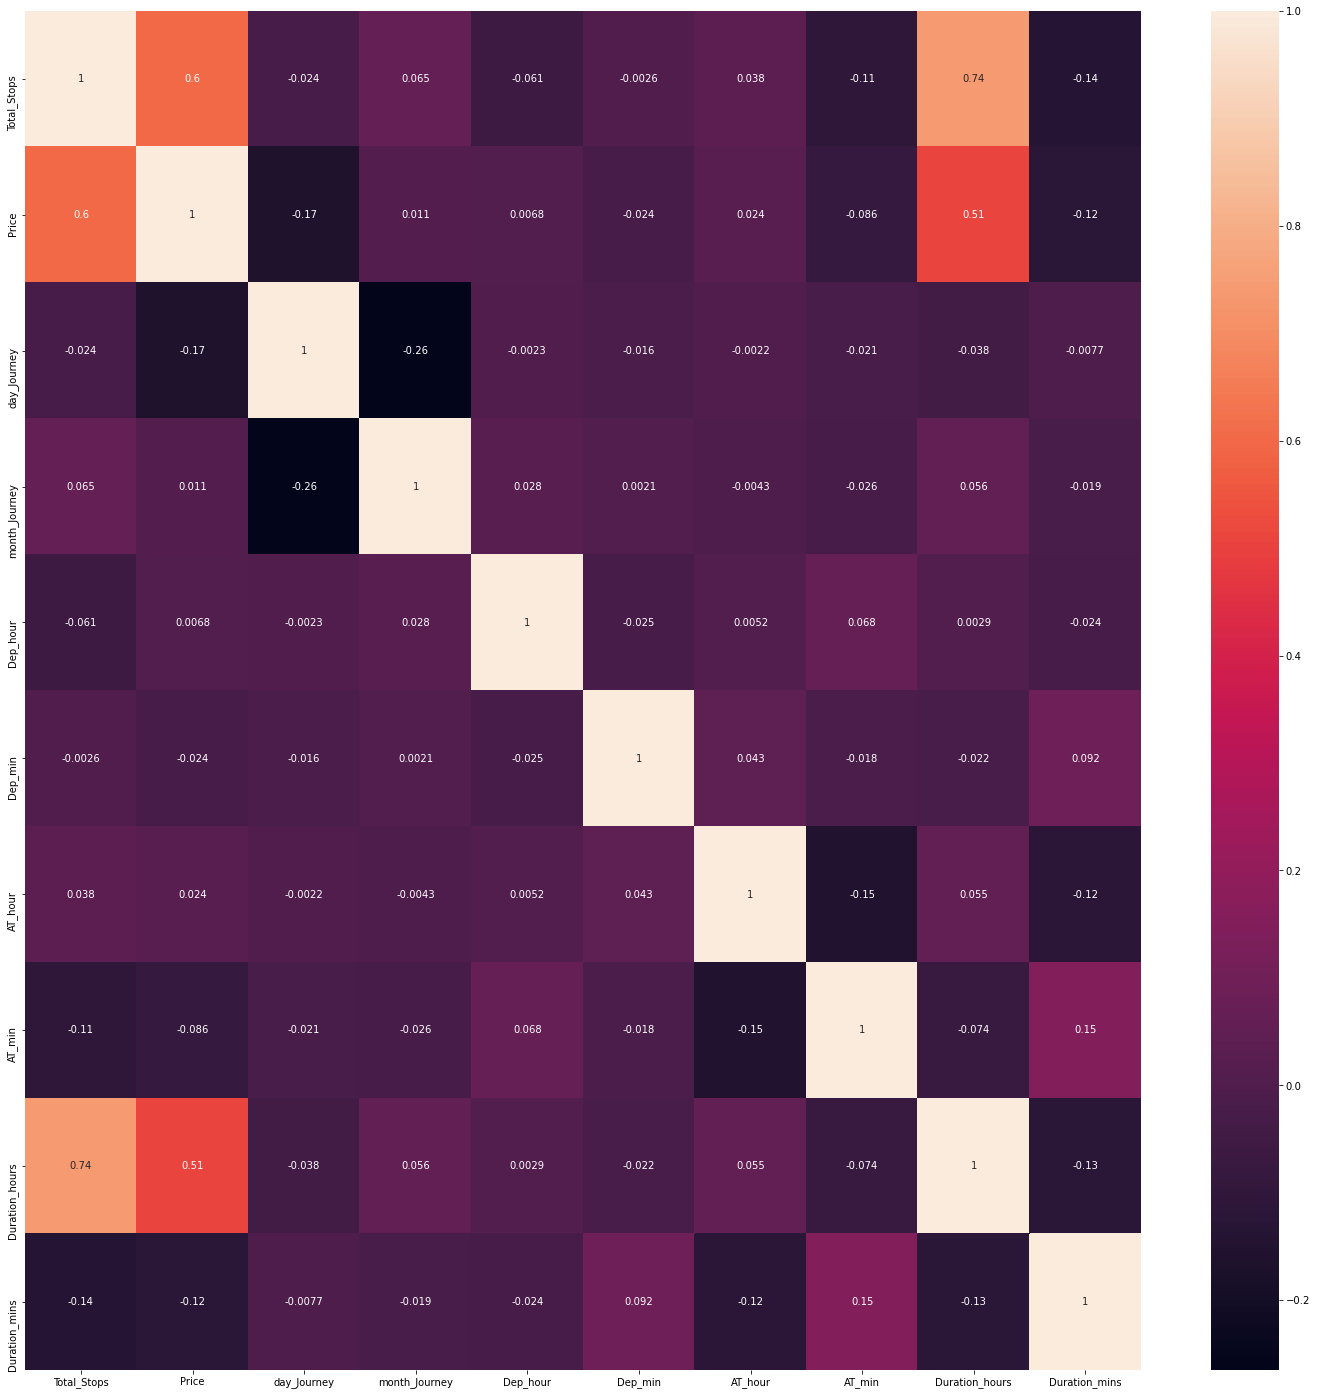

In [139]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [140]:
#Take only important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [141]:
model.feature_importances_

array([2.30473320e-01, 1.06991909e-01, 8.57206652e-02, 2.54477990e-02,
       2.21924687e-02, 2.87283740e-02, 2.04610820e-02, 1.29254416e-01,
       1.77098276e-02, 8.96396836e-03, 2.49547657e-03, 2.02953494e-02,
       1.32605095e-01, 6.68442519e-02, 1.62911730e-02, 8.77831201e-04,
       4.34290880e-03, 1.12903633e-04, 4.88913597e-03, 1.35009551e-04,
       3.65418457e-04, 7.54287703e-03, 7.46715177e-03, 2.71888140e-03,
       4.55772224e-04, 6.20196365e-03, 6.18118445e-03, 5.16791876e-03,
       7.08473086e-03, 6.13589275e-03, 2.39279292e-03, 3.33833767e-04,
       2.31186171e-02])

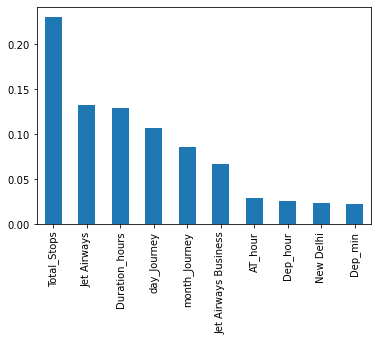

In [147]:
#top ten features that effect the Target variable
f = pd.Series(model.feature_importances_,index = X.columns)
f.nlargest(10).plot(kind='bar')
plt.show()

**Random Forest**

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [151]:
y_pred = rf.predict(X_test)# predicting for test data

**R-squared (R2)** provides an estimate of the _strength of the relationship between your model and the response variable_, it does not provide a formal hypothesis test for this relationship. The F-test of overall significance determines whether this relationship is statistically significant

In [152]:
rf.score(X_train, y_train) #r2 score of train data

0.9516421967251457

In [153]:
rf.score(X_test, y_test) ##r2 score of test data

0.79033085296268

/Users/harikrishnareddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


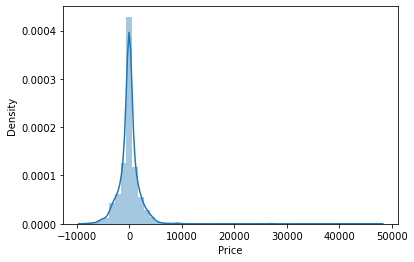

In [154]:
sns.distplot(y_test-y_pred)
plt.show()

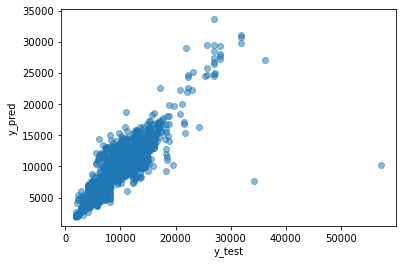

In [155]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [156]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.79033085296268

## Hyperparameter Tunning

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [158]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [159]:
# Random search of parameters(5-fold cross validation)
rf_random = RandomizedSearchCV(estimator =rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Getting the best params for this...!

In [160]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

/Users/harikrishnareddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


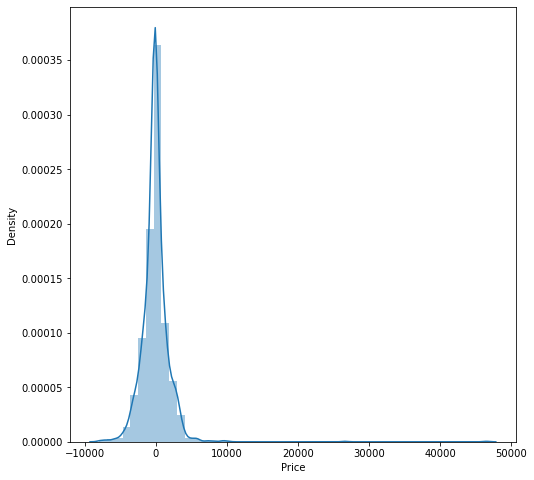

In [161]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

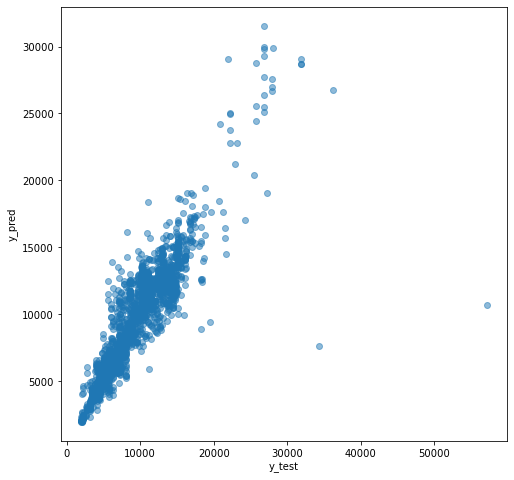

In [162]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

**Making Pickle**

In [165]:
import pickle

# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [167]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

y_prediction = forest.predict(X_test)

metrics.r2_score(y_test, y_prediction)

0.79033085296268